# Análise exploratória de dados sobre atrasos e cancelamentos de voôs

Url do dataset: https://www.kaggle.com/datasets/usdot/flight-delays?select=flights.csv

## Introdução/Objetivo da Análise

A ideia de compor este trabalho teve como base o projeto prático de EDA para a escola BTPS na IBM. Utilzando um dataset do site Kaggle (https://www.kaggle.com), cujo objetivo é analisar os voôs com atraso e cancelamento e desenvolver uma análise de dados. Além disso, os projetos para os BTPS visam treinar e desenvolver técnicas de modelagem, coletando os dados, descrevendo os referidos dados, bem como explorando os dados com as estatísticas descritivas e por fim, verificando a qualidade de dados.

Este trabalho é o resultado da aplicação prática de algumas destas técnicas.

## Entendendo os Dados

Por meio do link descrito no início, é possível baixar o dataset do kaggle para desenvolver análises. Assim, feito download do arquivo (flights.csv) ao qual iremos usar. 

In [126]:
# importando as bibliotecas necessárias para a análise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [91]:
# carregando os dados

df = pd.read_csv('./data/flights.csv')
df

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


- Dimensões do Dataframe: 5819079 (cinco milhões oitocentos e dezenove mil e setenta e nove) linhas e 31 colunas

### Descrição das Variáveis
- YEAR, MONTH, DAY, DAY_OF_WEEK: datas dos vôos
- AIRLINE: número de identificação para identificar uma companhia aérea
- FLIGHT_NUMBER: número do vôo
- TAIL_NUMBER: número identificador do avião localizado na calda
- ORIGIN_AIRPORT: Aeroporto de partida
- DESTINATION_AIRPORT: Aeroporto de destino
- SCHEDULED_DEPARTURE e SCHEDULED_ARRIVAL : horários programados de decolagem e pouso
- DEPARTURE_TIME e ARRIVAL_TIME: tempos reais de decolagem e pouso
- DEPARTURE_DELAY: atraso total na partida
- WHEELS_ON: O ponto de tempo em que as rodas da aeronave tocam no solo
- WHEELS_OFF: O momento em que as rodas da aeronave deixam o solo
- SCHEDULED_TIME: quantidade de tempo planejada necessária para a viagem de voo
- SCHEDULED_ARRIVAL: hora de chegada planejada
- TAXI_IN: A duração do tempo decorrido entre as rodas e a chegada ao portão no aeroporto de destino
- TAXI_OUT: O tempo decorrido entre a partida do portão do aeroporto de origem e a partida
- ELAPSED_TIME: AIR_TIME + TAXI_IN + TAXI_OUT
- DISTANCE: Distância entre dois aeroportos
- ARRIVAL_TIME: WHEELS_ON + TAXI_IN
- ARRIVAL_DELAY: ARRIVAL_TIME - SCHEDULED_ARRIVAL
- DIVERTED: Aeronave pousou em aeroporto fora do cronograma
- CANCELLED: Voo Cancelado
- CANCELATION_REASON: Motivo do cancelamento do voo
- SECURITY_DELAY: atraso causado pela segurança
- AIRLINE_DELAY: atraso causado pela companhia aérea
- LATE_AIRCRAFT_DELAY: atraso causado por aeronave
- WEATHER_DELAY: atraso causado pelo clima

### Obtendo informações gerais sobre os dados


In [92]:
#todos os nomes das colunas
df.columns.values

array(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
       'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME',
       'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED',
       'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY'], dtype=object)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

Tipos de valores
- float64 = 16, int64 = 10 e object = 5

In [94]:
df.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

### Verificando dados ausentes

In [95]:
# Verificar os nulos
pd.options.mode.use_inf_as_na = True # dados que tendem ao infinito também serão considerados nulos
df.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [96]:
#percentual de dados faltante na ordem decrescente
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

CANCELLATION_REASON    0.984554
WEATHER_DELAY          0.817250
LATE_AIRCRAFT_DELAY    0.817250
AIRLINE_DELAY          0.817250
SECURITY_DELAY         0.817250
AIR_SYSTEM_DELAY       0.817250
AIR_TIME               0.018056
ARRIVAL_DELAY          0.018056
ELAPSED_TIME           0.018056
WHEELS_ON              0.015898
TAXI_IN                0.015898
ARRIVAL_TIME           0.015898
TAXI_OUT               0.015303
WHEELS_OFF             0.015303
DEPARTURE_DELAY        0.014805
DEPARTURE_TIME         0.014805
TAIL_NUMBER            0.002530
SCHEDULED_TIME         0.000001
SCHEDULED_DEPARTURE    0.000000
CANCELLED              0.000000
DAY                    0.000000
DAY_OF_WEEK            0.000000
AIRLINE                0.000000
FLIGHT_NUMBER          0.000000
SCHEDULED_ARRIVAL      0.000000
DIVERTED               0.000000
ORIGIN_AIRPORT         0.000000
DISTANCE               0.000000
DESTINATION_AIRPORT    0.000000
MONTH                  0.000000
YEAR                   0.000000
dtype: f

- As variáveis CANCELLATION_REASON, WEATHER_DELAY, LATE_AIRCRAFT_DELAY, AIRLINE_DELAY, SECURITY_DELAY e AIR_SYSTEM_DELAY possuem alto percentual de dados faltantes 
pois cancelamentos e atrasos relacionados a esses motivos são baixos e então não são listados, logo é um dado faltante. 

In [97]:
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variável', 'dados faltantes']
missing_df['percentual até 100(%)']=(df.shape[0]-missing_df['dados faltantes'])/df.shape[0]*100
missing_df.sort_values('percentual até 100(%)').reset_index(drop = True)

,variável,dados faltantes,percentual até 100(%)
0,CANCELLATION_REASON,5729195,1.544643
1,WEATHER_DELAY,4755640,18.275040
2,AIRLINE_DELAY,4755640,18.275040
3,SECURITY_DELAY,4755640,18.275040
4,AIR_SYSTEM_DELAY,4755640,18.275040
5,LATE_AIRCRAFT_DELAY,4755640,18.275040
6,ARRIVAL_DELAY,105071,98.194371
7,AIR_TIME,105071,98.194371
8,ELAPSED_TIME,105071,98.194371
9,TAXI_IN,92513,98.410178


- As variáveis CANCELLATION_REASON, WEATHER_DELAY, LATE_AIRCRAFT_DELAY, AIRLINE_DELAY, SECURITY_DELAY e AIR_SYSTEM_DELAY possuem alto percentual 
de dados faltantes  pois cancelamentos e atrasos relacionados a esses motivos são baixos e então não são listados, logo é um dado faltante. 

In [98]:
#quando não houve atrasos de companhias aéreas, segurança ou clima, o valor foi deixado em branco, agora preenchendo com 0, pois os valores não influenciarão os dados.
df['AIRLINE_DELAY'] = df['AIRLINE_DELAY'].fillna(0)
df['AIR_SYSTEM_DELAY'] = df['AIR_SYSTEM_DELAY'].fillna(0)
df['SECURITY_DELAY'] = df['SECURITY_DELAY'].fillna(0)
df['LATE_AIRCRAFT_DELAY'] = df['LATE_AIRCRAFT_DELAY'].fillna(0)
df['WEATHER_DELAY'] = df['WEATHER_DELAY'].fillna(0)

In [99]:
#conferindo após remoção dos espaços em branco
missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['variável', 'dados faltantes']
missing_df['percentual até 100(%)']=(df.shape[0]-missing_df['dados faltantes'])/df.shape[0]*100
missing_df.sort_values('percentual até 100(%)').reset_index(drop = True)

,variável,dados faltantes,percentual até 100(%)
0,CANCELLATION_REASON,5729195,1.544643
1,ELAPSED_TIME,105071,98.194371
2,AIR_TIME,105071,98.194371
3,ARRIVAL_DELAY,105071,98.194371
4,TAXI_IN,92513,98.410178
5,ARRIVAL_TIME,92513,98.410178
6,WHEELS_ON,92513,98.410178
7,TAXI_OUT,89047,98.469741
8,WHEELS_OFF,89047,98.469741
9,DEPARTURE_TIME,86153,98.519474


- Somente a coluna 'CANCELLATION_REASON' não foi removido os espaços em brancos, mas iremos analisar agora mesmo.

In [100]:
#Exminando com detalhes a coluna 'cancellation_reason'
df['CANCELLATION_REASON'].value_counts()

B    48851
A    25262
C    15749
D       22
Name: CANCELLATION_REASON, dtype: int64

Motivo do cancelamento do voo: 
- A - Companhia Aérea/Transportadora; 
- B - Clima; 
- C - Sistema Aéreo Nacional; 
- D - Segurança

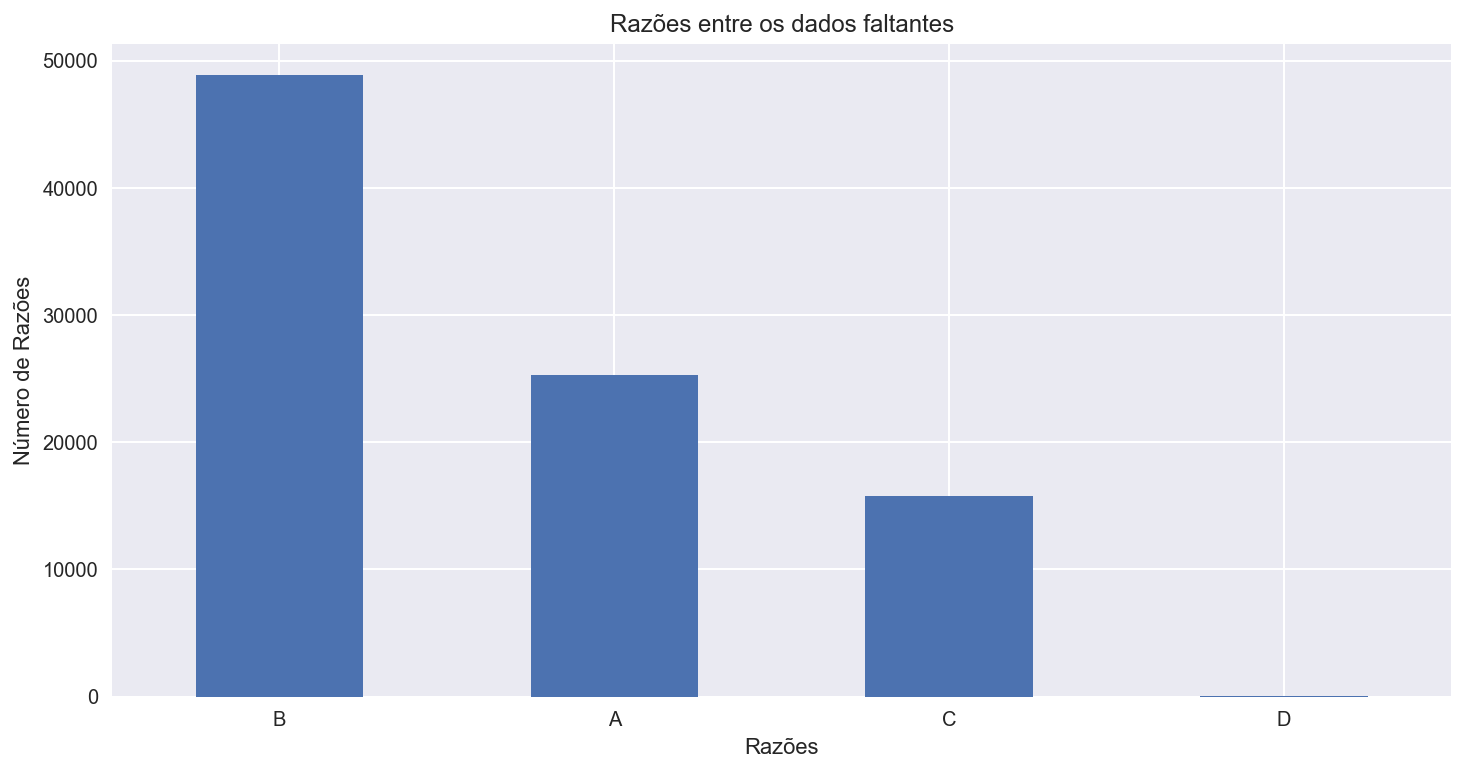

In [101]:
df['CANCELLATION_REASON'].value_counts().plot.bar(figsize=(12,6))
plt.ylabel("Número de Razões")
plt.xlabel("Razões")
plt.xticks(rotation=0)
plt.title("Razões entre os dados faltantes")
plt.show()

In [102]:
#preenchendo o NaN com a letra 'N' para nosso entendimento de que não houve cancelamento
df['CANCELLATION_REASON'] = df['CANCELLATION_REASON'].fillna('N')

#verificando a mudança
df['CANCELLATION_REASON'].value_counts()

N    5729195
B      48851
A      25262
C      15749
D         22
Name: CANCELLATION_REASON, dtype: int64

In [103]:
# criando uma coluna data combinando ano, mês e dia
df['DATE'] = pd.to_datetime(df[['YEAR','MONTH', 'DAY']])

df["DATE"].head()

0   2015-01-01
1   2015-01-01
2   2015-01-01
3   2015-01-01
4   2015-01-01
Name: DATE, dtype: datetime64[ns]

In [104]:
# carregando o dataframe 'airlines.csv'
df_airlines = pd.read_csv('./data/airlines.csv')
df_airlines

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [105]:
#renomeando a coluna e mesclando com o dataset principal
df = df.rename(columns={"AIRLINE":"IATA_CODE"})
df_merge = pd.merge(df,df_airlines,on="IATA_CODE")
df_merge.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,IATA_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE,AIRLINE
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,0,0,N,0.0,0.0,0.0,0.0,0.0,2015-01-01,Alaska Airlines Inc.
1,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,0,0,N,0.0,0.0,0.0,0.0,0.0,2015-01-01,Alaska Airlines Inc.
2,2015,1,1,4,AS,108,N309AS,ANC,SEA,45,...,0,0,N,0.0,0.0,0.0,0.0,0.0,2015-01-01,Alaska Airlines Inc.
3,2015,1,1,4,AS,122,N413AS,ANC,PDX,50,...,0,0,N,0.0,0.0,0.0,0.0,0.0,2015-01-01,Alaska Airlines Inc.
4,2015,1,1,4,AS,130,N457AS,FAI,SEA,115,...,0,0,N,0.0,0.0,0.0,0.0,0.0,2015-01-01,Alaska Airlines Inc.


In [106]:
#carregando o conjunto de dados Aeroportos e mesclando o aeroporto de origem e destino
df_airports = pd.read_csv('./data/airports.csv')
df_airports


,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [107]:
#renomeando a coluna
df_airports = df_airports.rename(columns={"IATA_CODE":"CODE"})
df_airports

,CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
...,...,...,...,...,...,...,...
317,WRG,Wrangell Airport,Wrangell,AK,USA,56.48433,-132.36982
318,WYS,Westerly State Airport,West Yellowstone,MT,USA,44.68840,-111.11764
319,XNA,Northwest Arkansas Regional Airport,Fayetteville/Springdale/Rogers,AR,USA,36.28187,-94.30681
320,YAK,Yakutat Airport,Yakutat,AK,USA,59.50336,-139.66023


In [108]:
# mesclando detalhes de origem
df = df_merge.merge(df_airports[['STATE','AIRPORT','CODE']], how = 'left',
                left_on = 'ORIGIN_AIRPORT', right_on = 'CODE').drop('CODE',axis=1)

#renomeando colunas 
df = df.rename(columns={"STATE":"ORIGIN_STATE","AIRPORT":"ORG_AIRPORT"})
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,IATA_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE,AIRLINE,ORIGIN_STATE,ORG_AIRPORT
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,N,0.0,0.0,0.0,0.0,0.0,2015-01-01,Alaska Airlines Inc.,AK,Ted Stevens Anchorage International Airport
1,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,N,0.0,0.0,0.0,0.0,0.0,2015-01-01,Alaska Airlines Inc.,WA,Seattle-Tacoma International Airport
2,2015,1,1,4,AS,108,N309AS,ANC,SEA,45,...,N,0.0,0.0,0.0,0.0,0.0,2015-01-01,Alaska Airlines Inc.,AK,Ted Stevens Anchorage International Airport
3,2015,1,1,4,AS,122,N413AS,ANC,PDX,50,...,N,0.0,0.0,0.0,0.0,0.0,2015-01-01,Alaska Airlines Inc.,AK,Ted Stevens Anchorage International Airport
4,2015,1,1,4,AS,130,N457AS,FAI,SEA,115,...,N,0.0,0.0,0.0,0.0,0.0,2015-01-01,Alaska Airlines Inc.,AK,Fairbanks International Airport


In [109]:
# mesclando detalhes de destino
df = df.merge(df_airports[['STATE','AIRPORT','CODE']], how = 'left',
                left_on = 'DESTINATION_AIRPORT', right_on = 'CODE').drop('CODE',axis=1)

# renomeando coluna
df = df.rename(columns={"STATE":"DESTINATION_STATE","AIRPORT":"DES_AIRPORT"})
df.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,IATA_CODE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DATE,AIRLINE,ORIGIN_STATE,ORG_AIRPORT,DESTINATION_STATE,DES_AIRPORT
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,0.0,0.0,0.0,0.0,2015-01-01,Alaska Airlines Inc.,AK,Ted Stevens Anchorage International Airport,WA,Seattle-Tacoma International Airport
1,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,0.0,0.0,0.0,0.0,2015-01-01,Alaska Airlines Inc.,WA,Seattle-Tacoma International Airport,AK,Ted Stevens Anchorage International Airport
2,2015,1,1,4,AS,108,N309AS,ANC,SEA,45,...,0.0,0.0,0.0,0.0,2015-01-01,Alaska Airlines Inc.,AK,Ted Stevens Anchorage International Airport,WA,Seattle-Tacoma International Airport
3,2015,1,1,4,AS,122,N413AS,ANC,PDX,50,...,0.0,0.0,0.0,0.0,2015-01-01,Alaska Airlines Inc.,AK,Ted Stevens Anchorage International Airport,OR,Portland International Airport
4,2015,1,1,4,AS,130,N457AS,FAI,SEA,115,...,0.0,0.0,0.0,0.0,2015-01-01,Alaska Airlines Inc.,AK,Fairbanks International Airport,WA,Seattle-Tacoma International Airport


In [110]:
df.columns.values

array(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'IATA_CODE',
       'FLIGHT_NUMBER', 'TAIL_NUMBER', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
       'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED',
       'CANCELLED', 'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'DATE', 'AIRLINE', 'ORIGIN_STATE', 'ORG_AIRPORT',
       'DESTINATION_STATE', 'DES_AIRPORT'], dtype=object)

### Visualização e análise dos dados

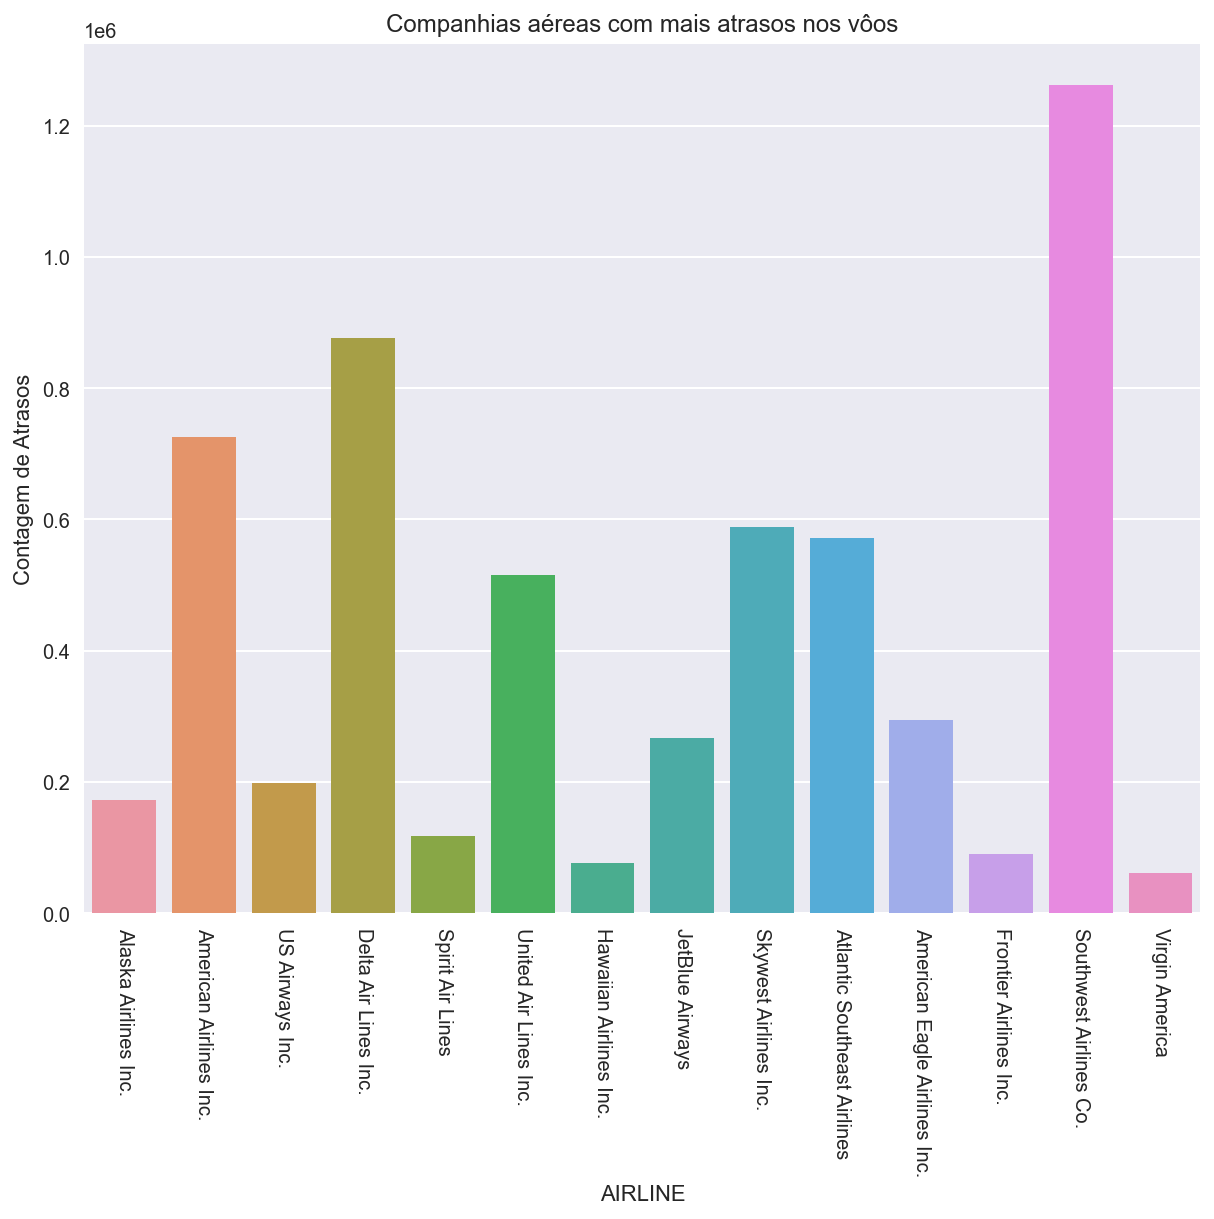

In [111]:
#contagem de atrasos por companhia aérea
plt.style.use('seaborn')
plt.rc('figure', figsize = (10,8))
sns.countplot(df['AIRLINE'])
plt.xticks(rotation=-90)
plt.ylabel("Contagem de Atrasos")
plt.title("Companhias aéreas com mais atrasos nos vôos")
plt.show()

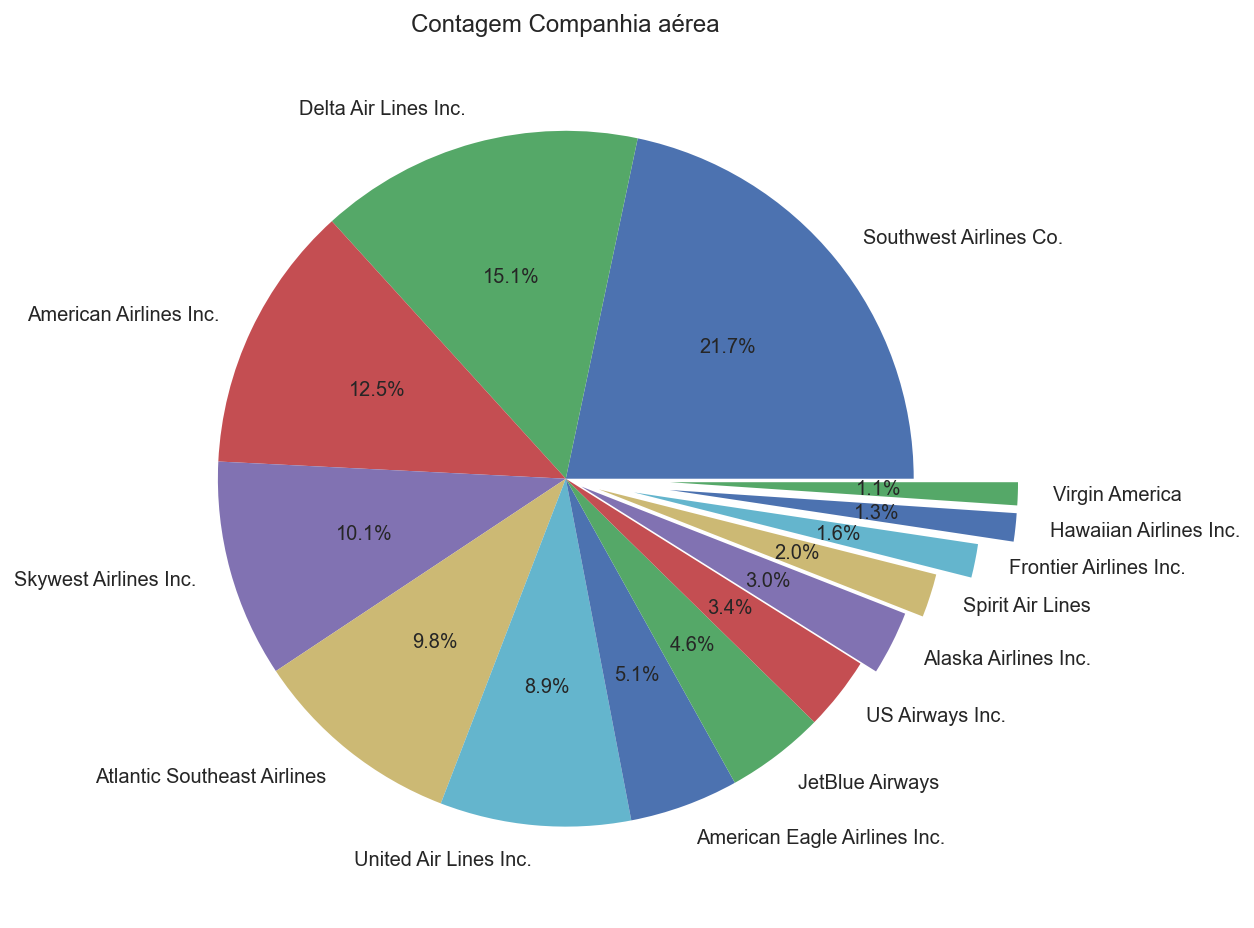

In [112]:
#gráfico de torta com porcentagem das companhias aéreas 
airlines_labels = list(df['AIRLINE'].value_counts().index)
plt.pie(df['AIRLINE'].value_counts(), autopct = '%1.1f%%',labels = airlines_labels, explode = (0,0,0,0,0,0,0,0,0,0.05,0.1,0.2,0.3,0.3))
plt.title("Contagem Companhia aérea")
plt.show()

In [113]:
df['AIRLINE'].value_counts()

Southwest Airlines Co.          1261855
Delta Air Lines Inc.             875881
American Airlines Inc.           725984
Skywest Airlines Inc.            588353
Atlantic Southeast Airlines      571977
United Air Lines Inc.            515723
American Eagle Airlines Inc.     294632
JetBlue Airways                  267048
US Airways Inc.                  198715
Alaska Airlines Inc.             172521
Spirit Air Lines                 117379
Frontier Airlines Inc.            90836
Hawaiian Airlines Inc.            76272
Virgin America                    61903
Name: AIRLINE, dtype: int64


- Percebe-se que a companhia aérea Southwest Airlines Co. possui o maior número de registros.

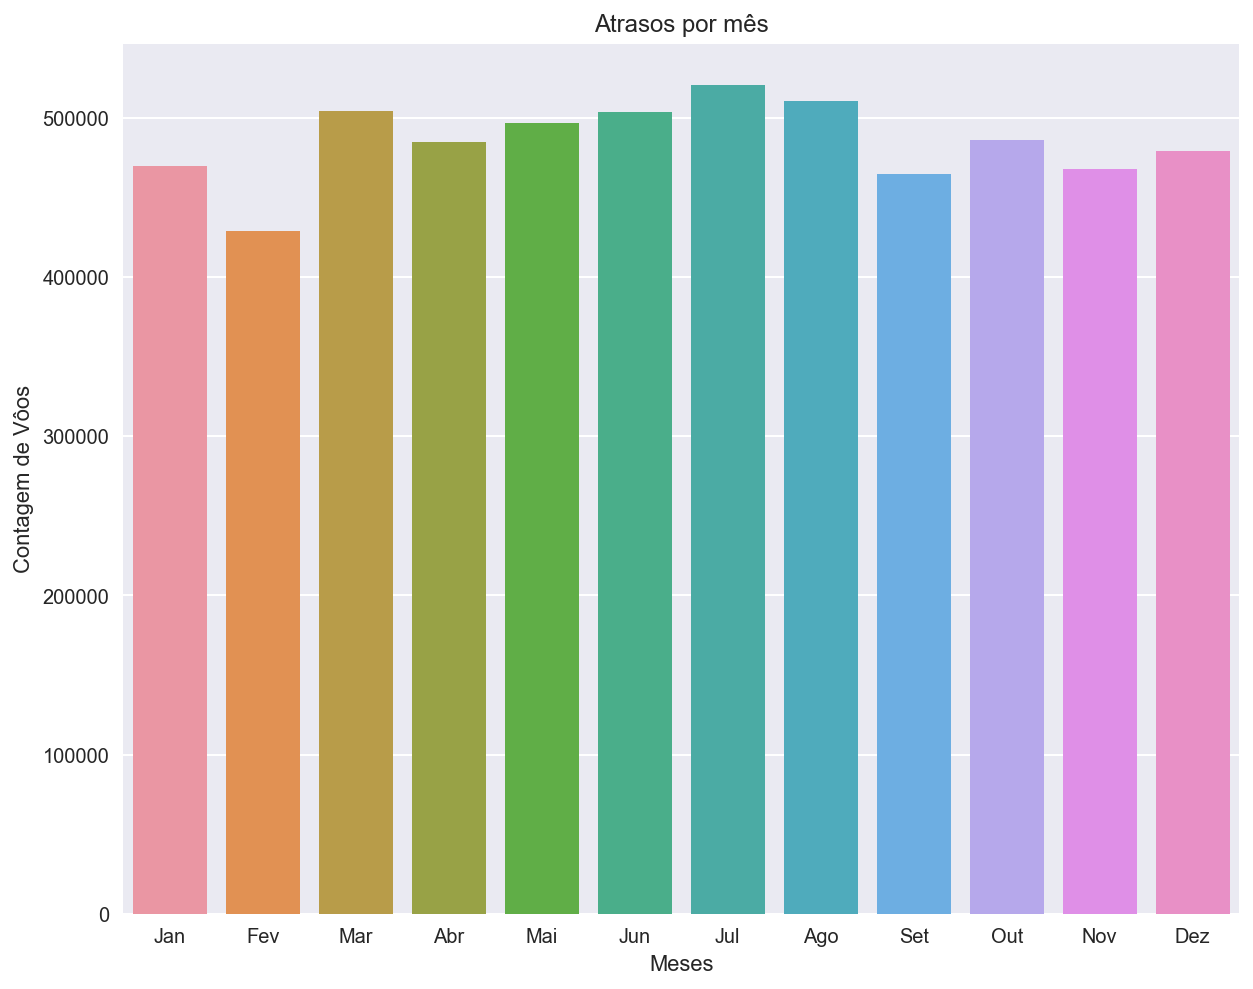

In [114]:
# plotagem dos dados por mês

sns.countplot(df['MONTH'])
plt.xlabel("Meses")
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
plt.xticks(labels=meses, ticks=np.arange(0,12,1))
plt.ylabel("Contagem de Vôos")
plt.title("Atrasos por mês")
plt.show()

In [115]:
df['MONTH'].value_counts()

7     520718
8     510536
3     504312
6     503897
5     496993
10    486165
4     485151
12    479230
1     469968
11    467972
9     464946
2     429191
Name: MONTH, dtype: int64

- Percebe-se uma constância de atrasos ou cancelamento nos meses do ano de 2015
- Apesar da constância, julho foi o mês que mais houve atrasos

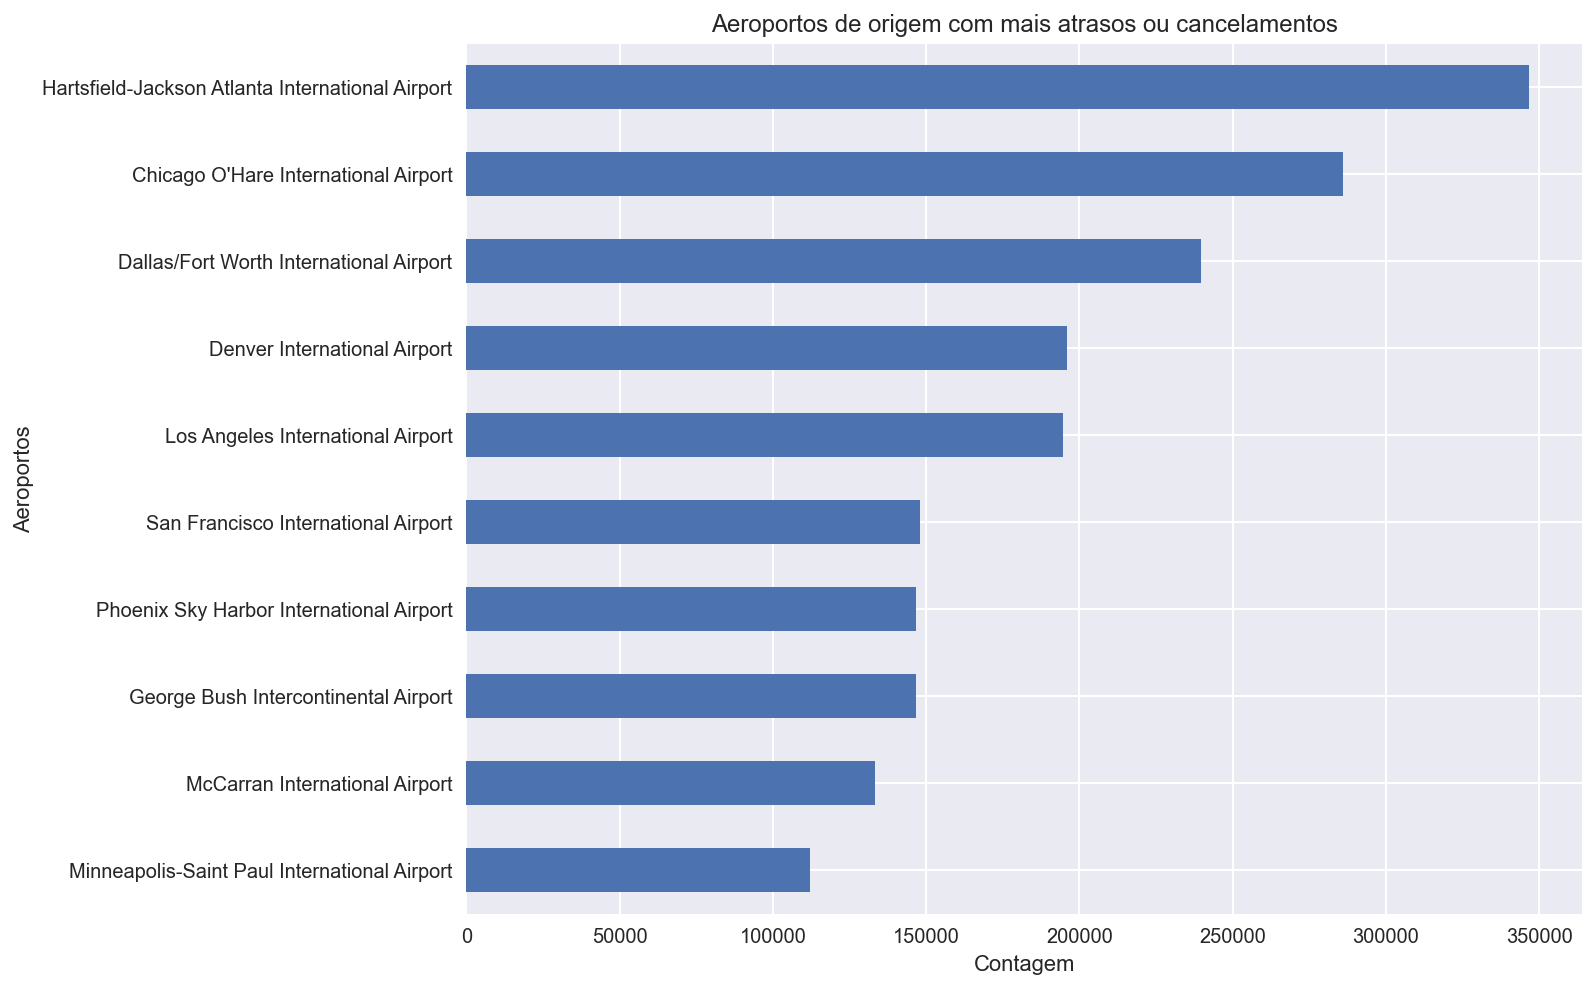

In [116]:
# Plotagem dos aeroportos de origem com mais ocorrência de atrasos ou cancelamentos
df['ORG_AIRPORT'].value_counts().sort_values().iloc[-10:].plot(kind='barh')
plt.xlabel("Contagem")
plt.ylabel("Aeroportos")
plt.title("Aeroportos de origem com mais atrasos ou cancelamentos")
plt.show()

In [117]:
df['ORG_AIRPORT'].value_counts()

Hartsfield-Jackson Atlanta International Airport    346836
Chicago O'Hare International Airport                285884
Dallas/Fort Worth International Airport             239551
Denver International Airport                        196055
Los Angeles International Airport                   194673
                                                     ...  
Barnstable Municipal Airport                            83
Gustavus Airport                                        77
Dillingham Airport                                      77
King Salmon Airport                                     63
Ithaca Tompkins Regional Airport                        34
Name: ORG_AIRPORT, Length: 322, dtype: int64

- O Aeroporto de origem onde ocorreu mais atrasos ou cancelamento é Hartsfield-Jackson Atlanta International Airport.

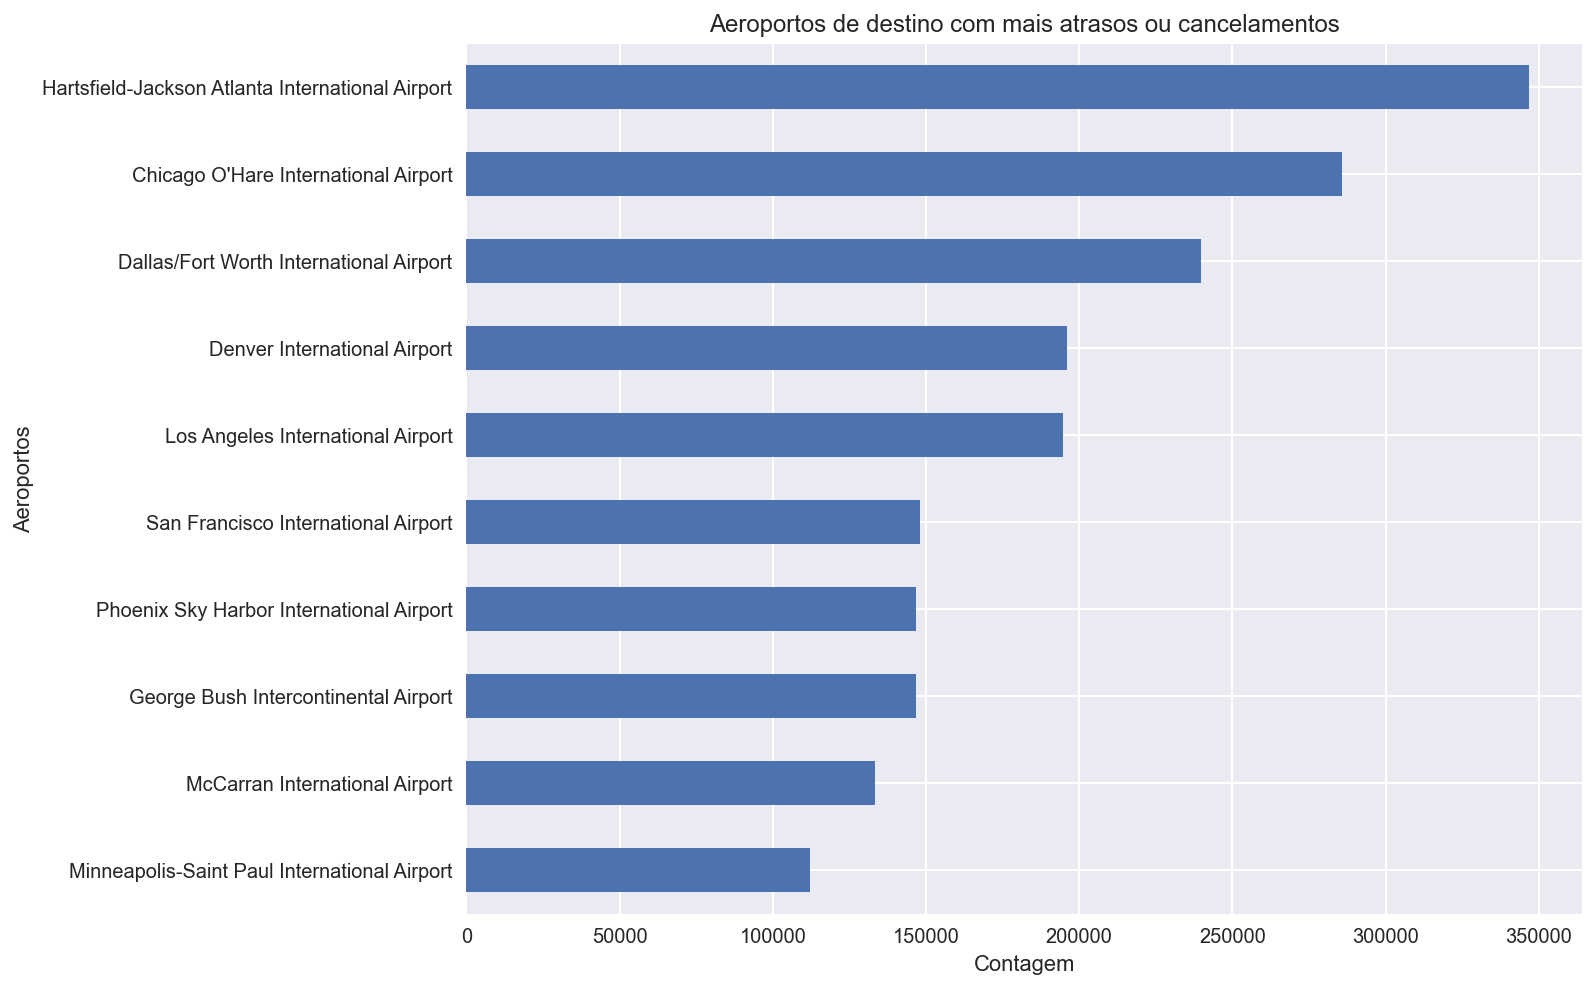

In [118]:
# Plotagem dos aeroportos de destino com mais ocorrência de atrasos ou cancelamentos
df['DES_AIRPORT'].value_counts().sort_values().iloc[-10:].plot(kind='barh')
plt.xlabel("Contagem")
plt.ylabel("Aeroportos")
plt.title("Aeroportos de destino com mais atrasos ou cancelamentos")
plt.show()

- Assim, o mesmo aeroport 'Hartsfield-Jackson Atlanta International Airport' possui mais atrasos também na chegada.

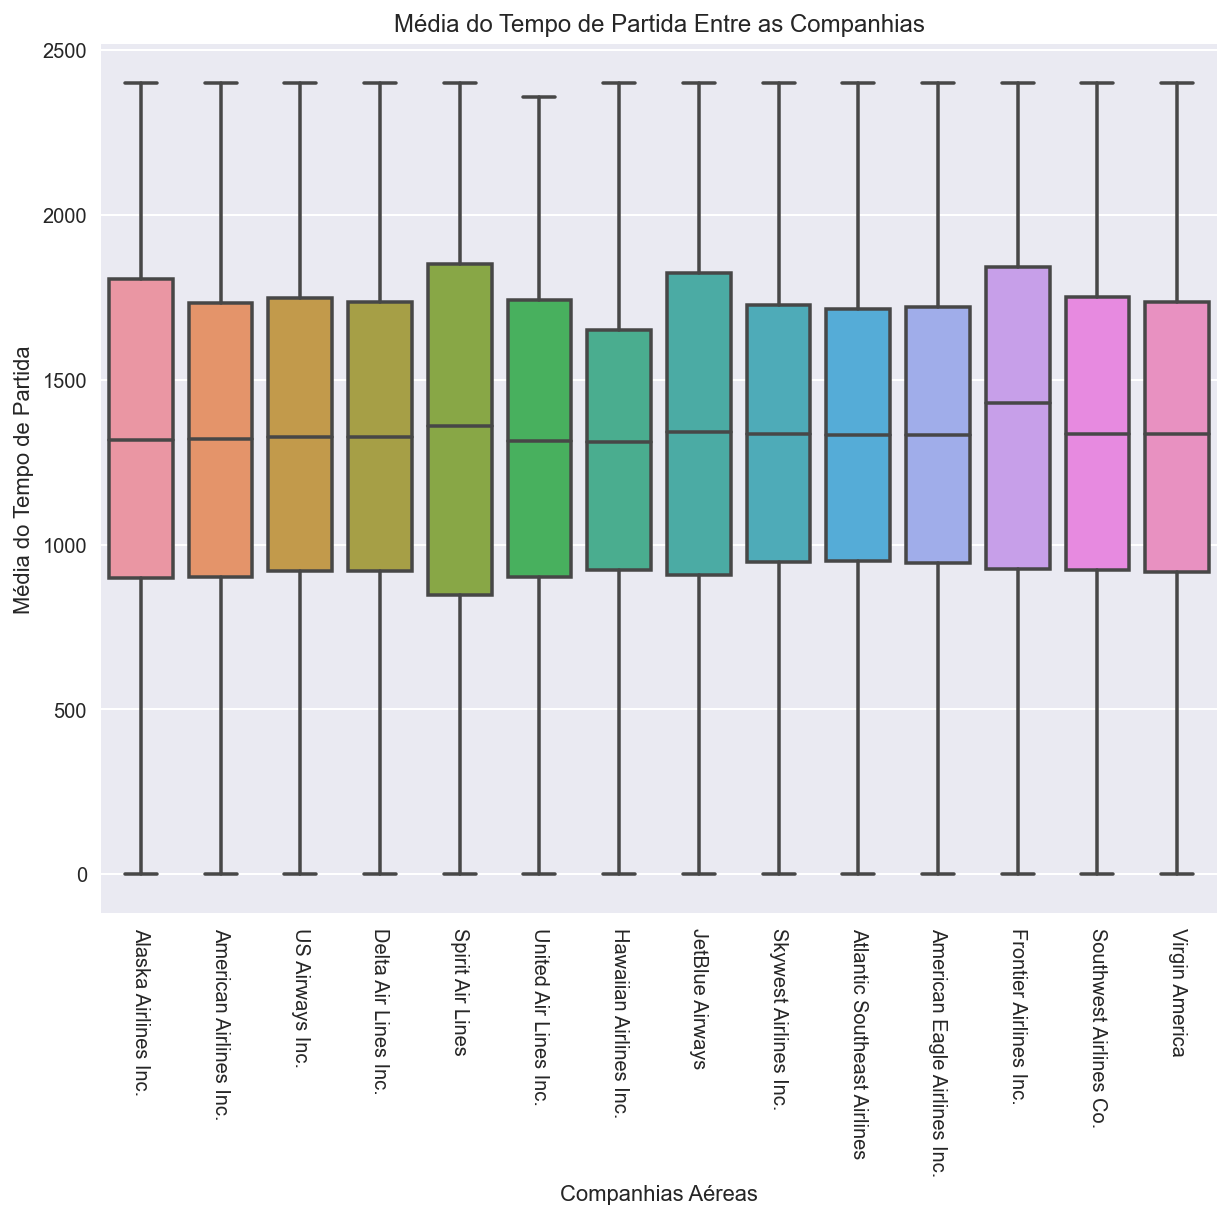

In [119]:
#Plotando o boxplot da média do tempo de partida das companhias
df_mean = df.groupby('AIRLINE').mean()['DEPARTURE_TIME'].sort_values()

sns.boxplot(x = df.AIRLINE, y = df.DEPARTURE_TIME)
plt.xlabel("Companhias Aéreas")
plt.xticks(rotation=-90)
plt.ylabel("Média do Tempo de Partida")
plt.title("Média do Tempo de Partida Entre as Companhias")
plt.show()

- Assim, vemos que as médias de tempo de partida entre as companhias são bem constantes, embora as companhias aéreas Frontier Airlines e Spirit Air Lines, possuem respectivamente, as maiores médias de tempo de partida.

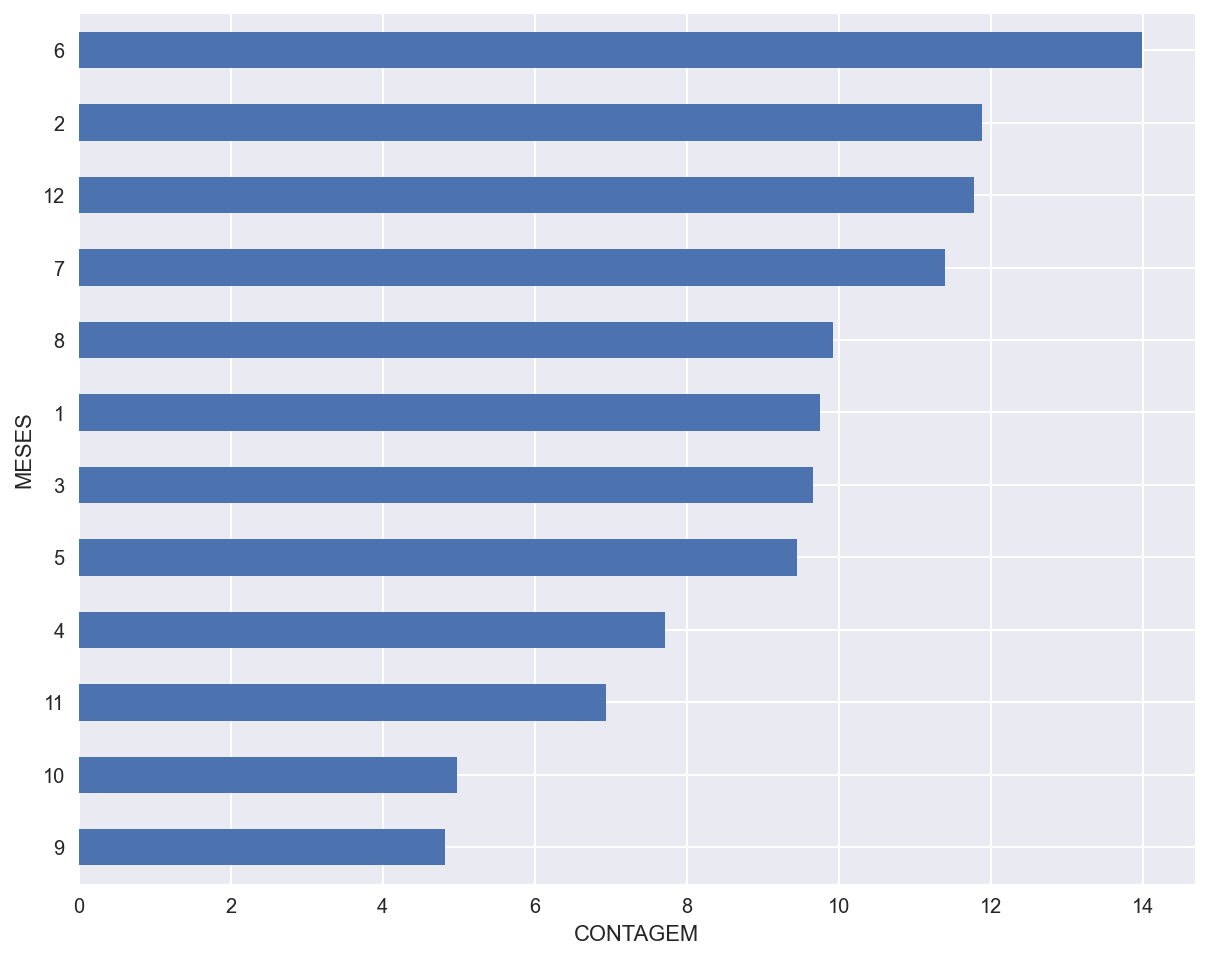

In [120]:
# Plotagem do atraso médio de partida por mês
df.groupby('MONTH').mean()['DEPARTURE_DELAY'].sort_values().plot(kind='barh')
plt.xlabel("CONTAGEM")
plt.ylabel("MESES")
plt.show()

- Os mês de Junho e o mês de Fevereiro possuem, respectivamente, as maiores médias de atraso de partida.

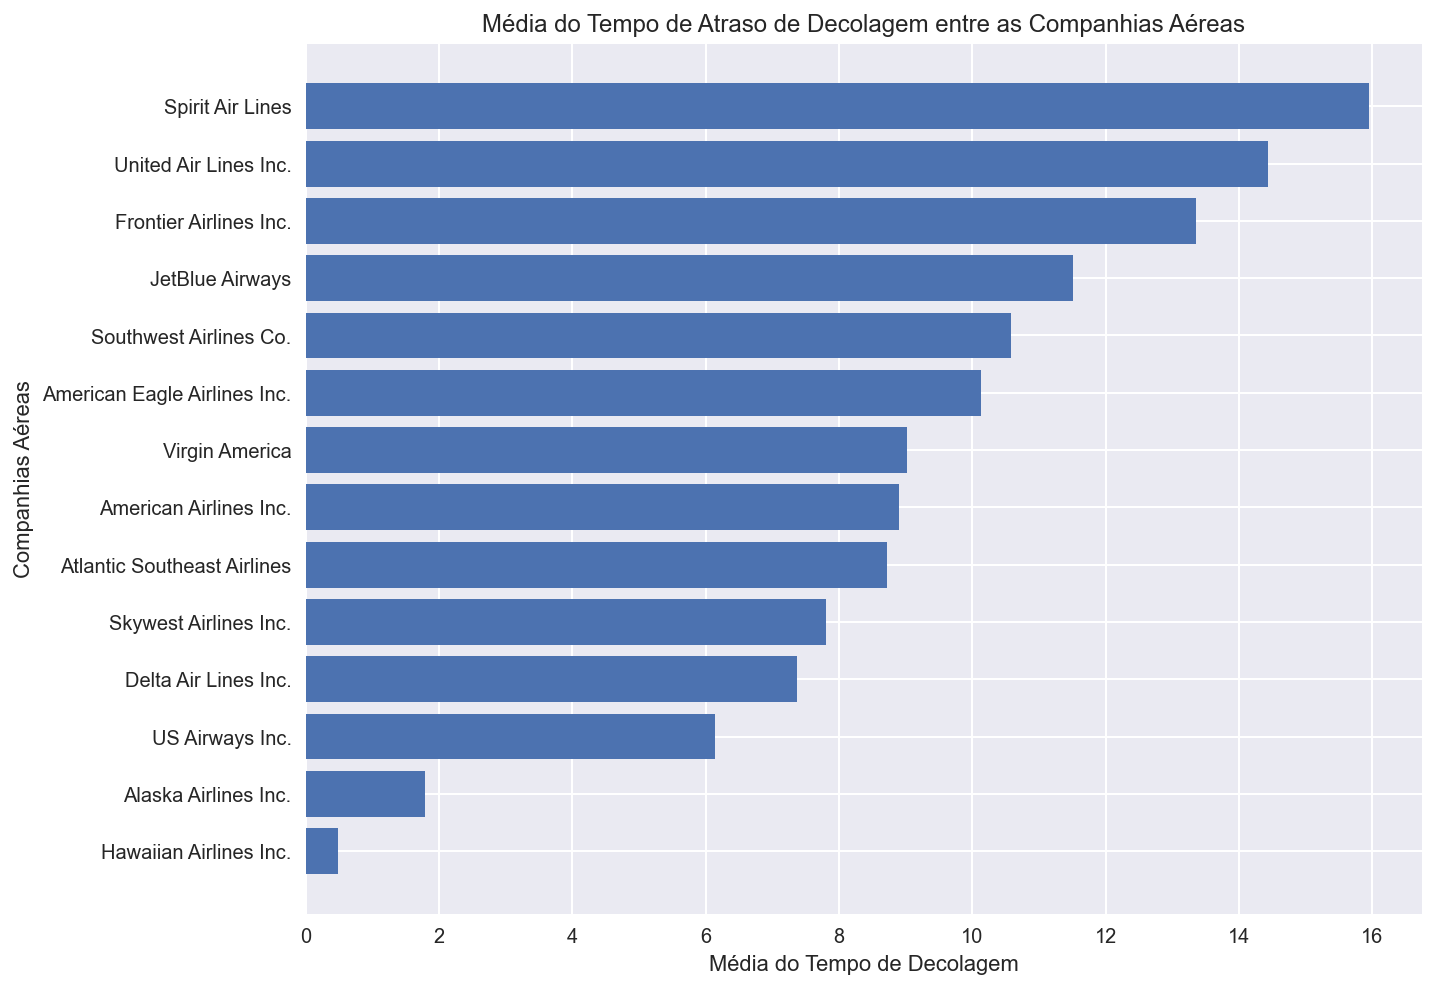

In [121]:
# Companhias com maiores atasos de decolagem

df_mean_2 = df.groupby('AIRLINE').mean()['DEPARTURE_DELAY'].sort_values()

plt.barh(y = df_mean_2.index, width = df_mean_2.values)
plt.xlabel("Média do Tempo de Decolagem")
plt.ylabel("Companhias Aéreas")
plt.title("Média do Tempo de Atraso de Decolagem entre as Companhias Aéreas")
plt.show()

- Companhia aérea Spirit Airlines possui a maior média de tempo de atrasos de partida.
- Hawaiian Airlines possui a menor média de tempo de atrasos de partida.

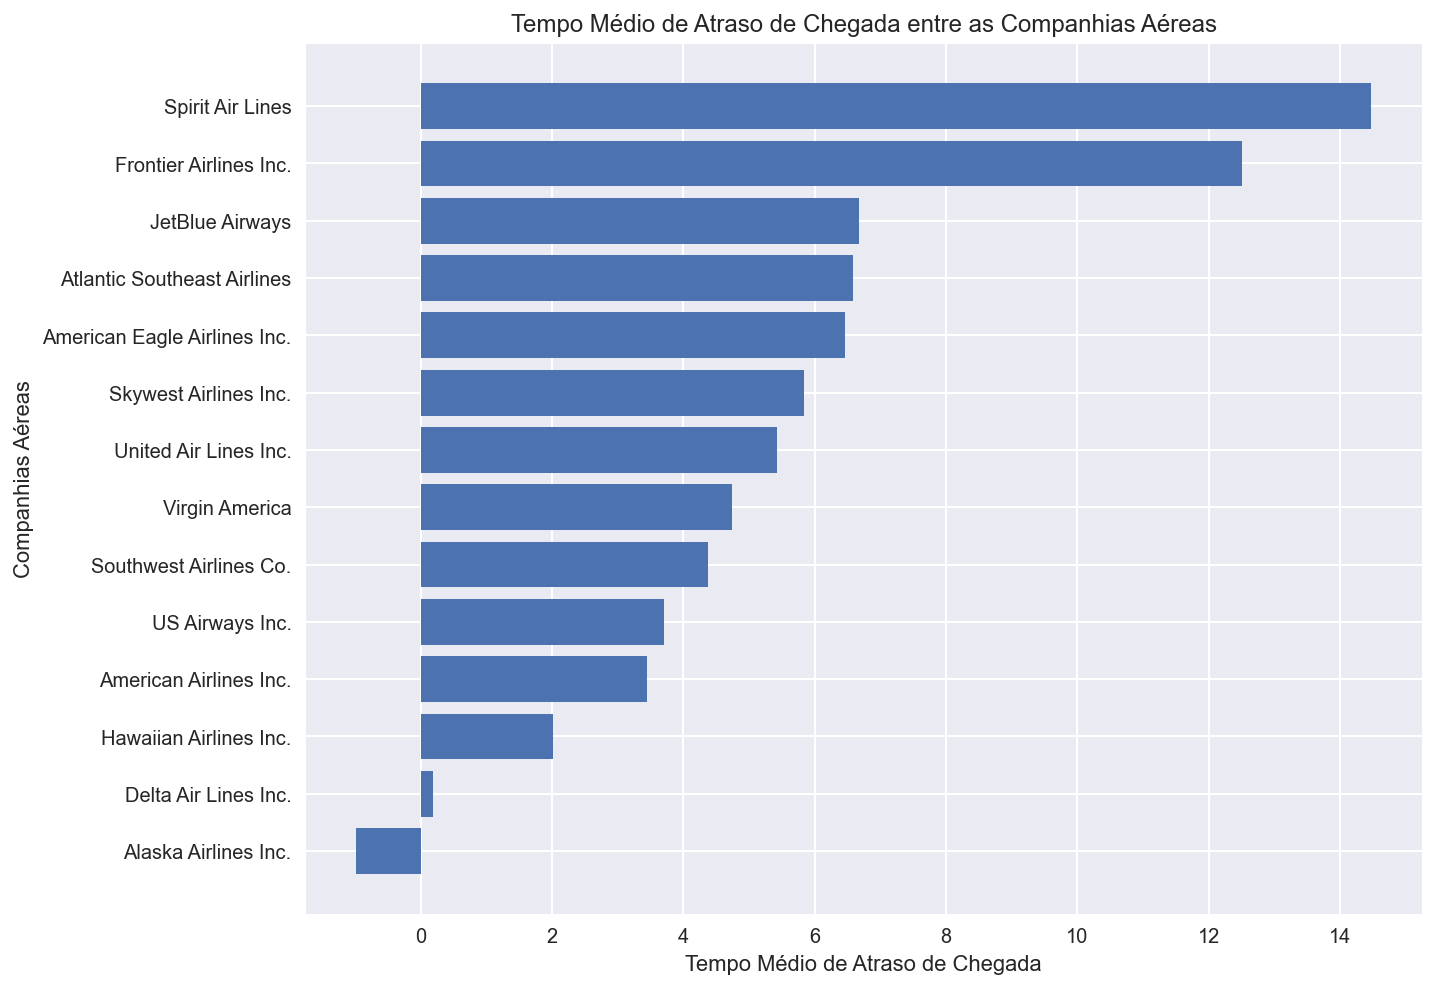

In [122]:
# Plotagem das companhias aéreas com o atraso de chegada (ARRIVAL_DELAY)

df_mean_3 = df.groupby('AIRLINE').mean()['ARRIVAL_DELAY'].sort_values()

plt.barh(y = df_mean_3.index, width =  df_mean_3.values)
plt.xlabel("Tempo Médio de Atraso de Chegada")
plt.ylabel("Companhias Aéreas")
plt.title("Tempo Médio de Atraso de Chegada entre as Companhias Aéreas")
plt.show()

- Mais uma vez Spirit Airlines sendo a companhia aérea com maior tempo médio de chegada
- Interessante notar que a Alaska Airlines possui um tempo médio mínimo abaixo de 0. Isso significa que os voos, em média, costumavam chegar antes do horário previsto.

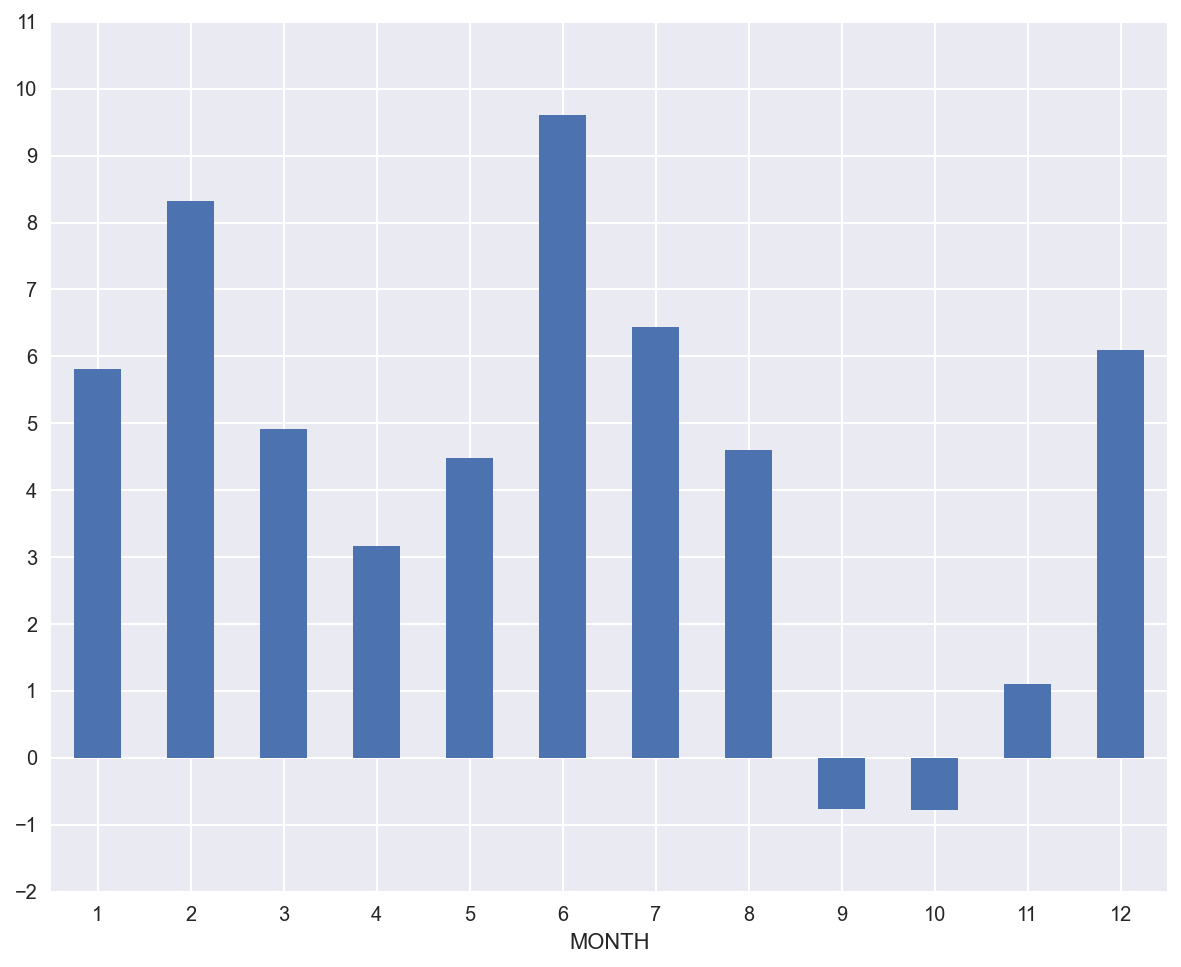

In [123]:
# Plotagem do tempo médio de atraso em comparação aos meses
df.groupby('MONTH').mean()['ARRIVAL_DELAY'].sort_index().plot(kind='bar')
plt.yticks(np.arange(-2,12,1))
plt.xticks(rotation=0)
plt.show()

####

- Os meses de setembro e outubro têm uma média de chegada negativa. Isso significa que os voos, em média, costumavam chegar antes do horário previsto.

In [124]:
#excluindo algumas colunas para melhor visualização do heatmap
df_clean = df.drop(['YEAR','DAY','MONTH','DAY_OF_WEEK', 'FLIGHT_NUMBER', 'DIVERTED','CANCELLED','WHEELS_ON','WHEELS_OFF'], axis=1)

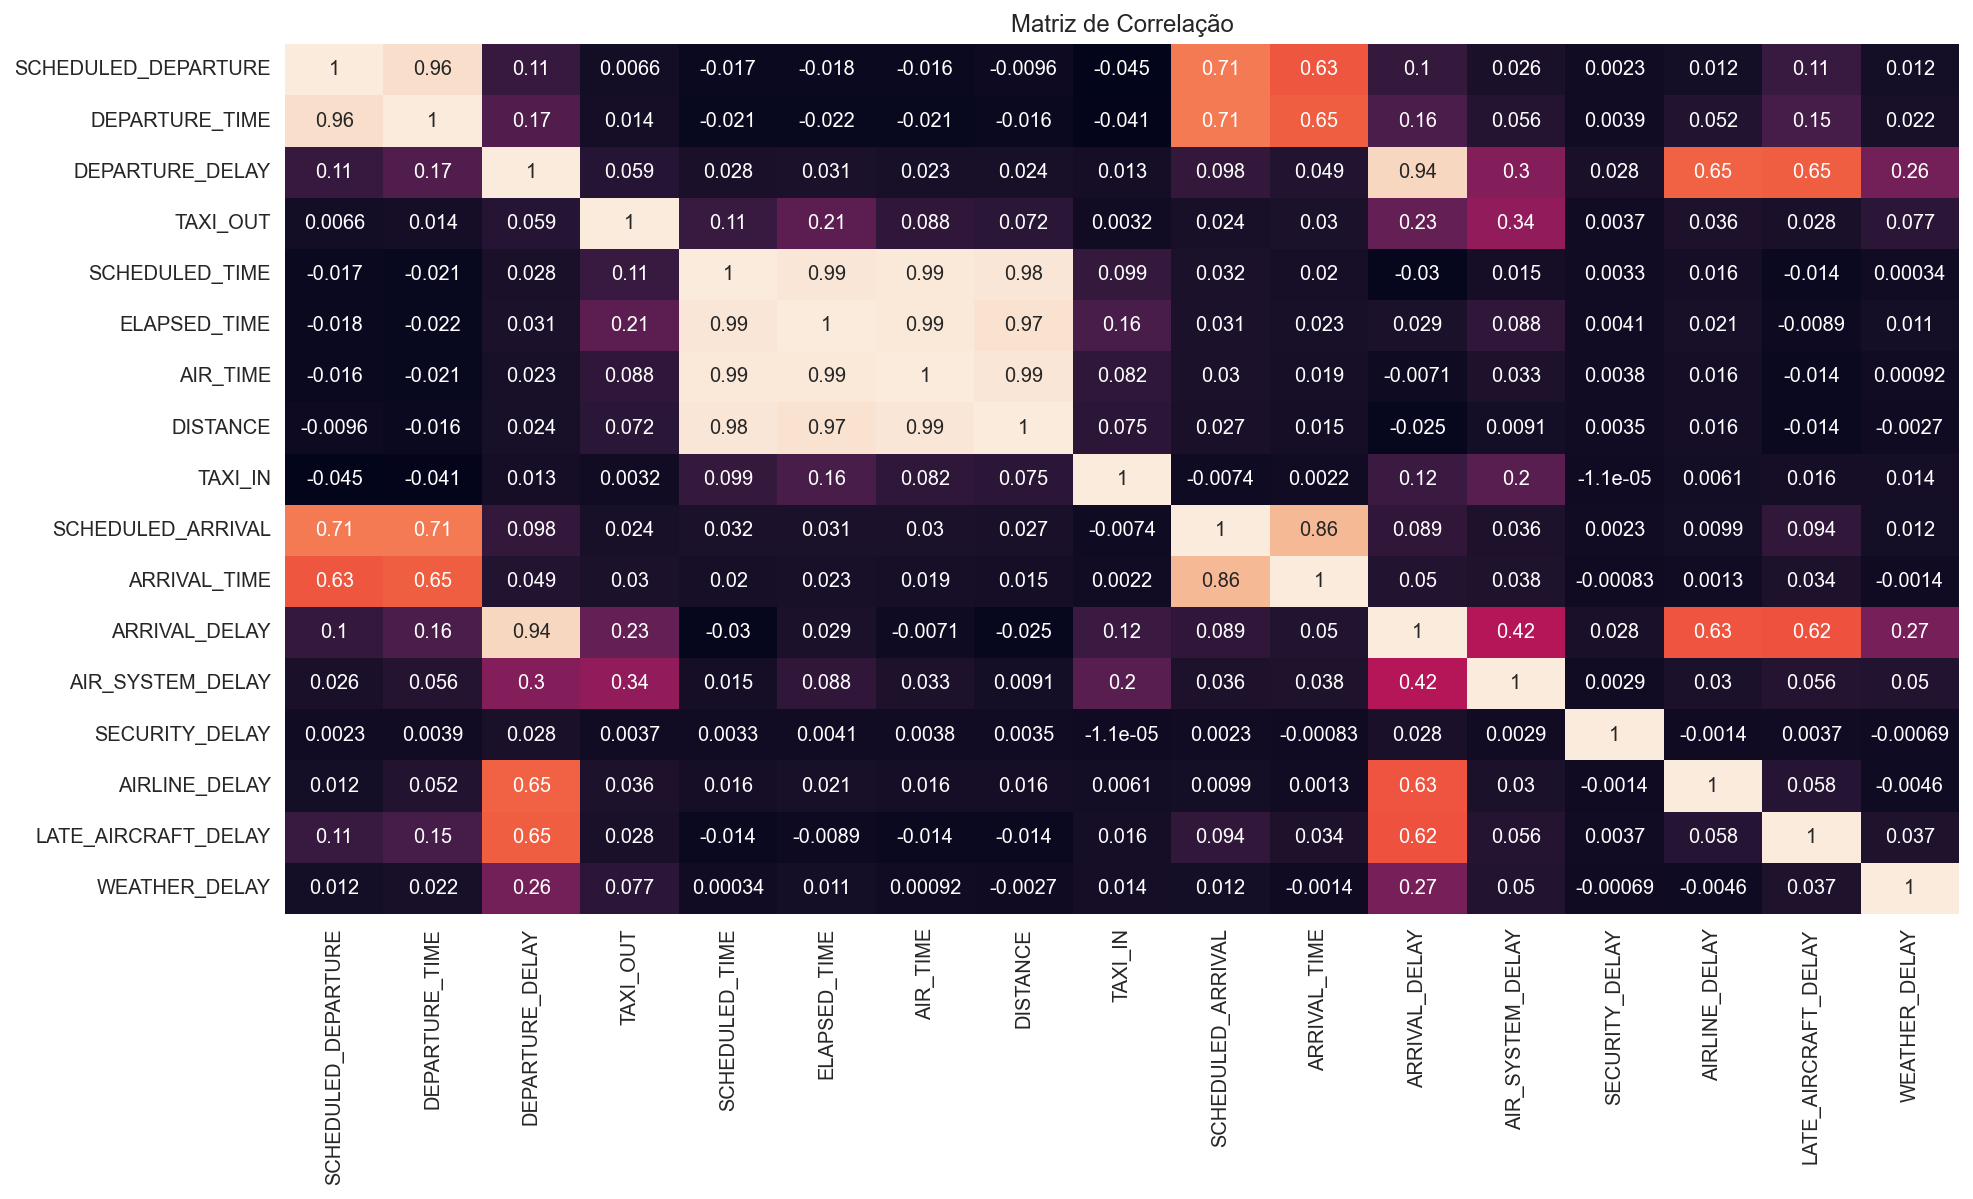

In [125]:
# plotando a matriz de correlação

corr = df_clean.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, cbar=False)
plt.title("Matriz de Correlação")
plt.show()



Correlações positivas maiores que 0.6

- Correlações Positivas: SCHEDULE_DEPARTURE e SCHEDULE_ARRIVAL; SCHEDULE_DEPARTURE e ARRIVAL_TIME; DEPARTURE_TIME e SCHEDULE_ARRIVAL; DEPARTURE_TIME e ARRIVAL_TIME; SCHEDULE_ARRIVAL e SCHEDULE_DEPARTURE; SCHEDULE_ARRIVAL e DEPARTURE_TIME; ARRIVAL_TIME e SCHEDULE_DEPARTURE; ARRIVAL_TIME e DEPARTURE_TIME.
   
   

### Conclusão

Análise de dados feita com base no dataset do Kaggle de atrasos e cancelamentos vôos em 2015 no EUA. Com essa análise, foi possível desenvolver bons resultados sobre atrasos e cancelamentos. Assim, ao analisar os aeroportos com mais atrasos ou cancelamentos têm-se um panorama a respeito da média de tempo, bem como a média mensal.

A análise também foi feita para identificar as companhias aéreas com tempos médios maiores de atraso, tempo de partida, tempo de chegada e tempo médio mensal. Nota-se que algumas companhias teve um tempo médio negativo, o que indica que os vôos chegam antes do previsto.